In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_regression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
class LinearRegression_scratch:
    """Linear Regression implemented from scratch using Gradient Descent"""

    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.w = None
        self.b = None
        self.loss_history = []

    def predict(self, X: np.ndarray):
        """
        Y = Xw + b\n
        Here:\n
        X = Matrix of features\n
        w = Weights vector\n
        b = intercept
        """
        return X @ self.w + self.b

    def _compute_loss(self, X, Y):
        """Mean Squared error loss\n
        MSE = 1/n(sum(Y_real - y_pred))
        """
        Y_pred = self.predict(X)
        Errors = Y - Y_pred
        loss = np.mean(Errors**2)
        return loss

    def _compute_gradients(self, X: np.ndarray, Y):
        """Compute gradients of loss w.r.t weights and bias"""
        n_samples = X.shape[0]
        y_pred = self.predict(X)
        Errors = y_pred - Y

        dw = (2 / n_samples) * (X.T @ Errors)
        db = (2 / n_samples) * np.sum(Errors)
        return dw, db

    def fit(self, X: np.ndarray, Y, Verbose=False):
        """Train the model using Gradient Descent"""
        n_samples, n_feature = X.shape
        self.w = np.zeros(n_feature)
        self.b = 0.0
        for i in range(self.n_iters):
            dw, db = self._compute_gradients(X, Y)
            # Update parameters
            self.w -= self.lr * dw
            self.b -= self.lr * db
            loss = self._compute_loss(X, Y)
            self.loss_history.append(loss)

            if Verbose and i % 100 == 0:
                print(f"iter {i}: loss={loss:.6f}")
        return self

## first: linear regression sklearn test

In [3]:
x, y = make_regression(
    n_samples=1000, n_features=2, n_targets=1, noise=6, random_state=42
)

In [4]:
x

array([[-0.16711808,  0.14671369],
       [-0.02090159,  0.11732738],
       [ 0.15041891,  0.364961  ],
       ...,
       [ 0.30263547, -0.75427585],
       [ 0.38193545,  0.43004165],
       [ 0.07736831, -0.8612842 ]], shape=(1000, 2))

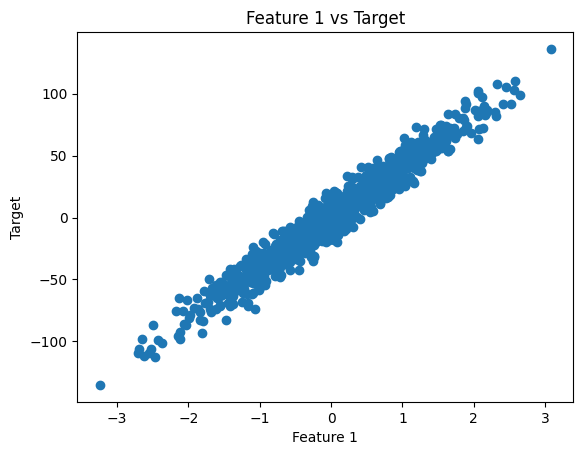

In [5]:
plt.scatter(x[:, 0], y)
plt.xlabel("Feature 1")
plt.ylabel("Target")
plt.title("Feature 1 vs Target")
plt.show()


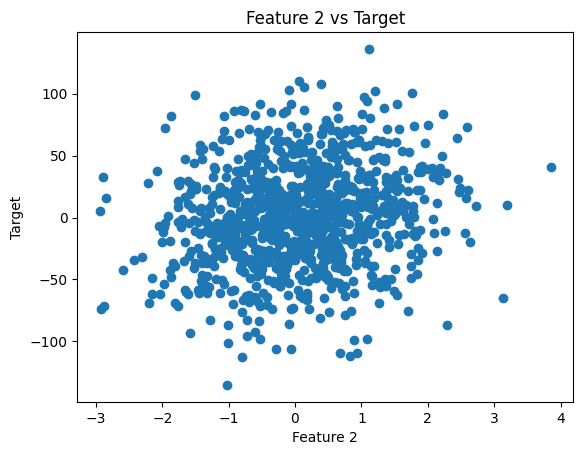

In [6]:
plt.scatter(x[:, 1], y)
plt.xlabel("Feature 2")
plt.ylabel("Target")
plt.title("Feature 2 vs Target")
plt.show()


In [7]:
X = x
Y = y

In [8]:
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [9]:
Pipeline_sk = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

In [10]:
Pipeline_sk.fit(x_train, y_train.ravel())

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [11]:
print(f"model coef: {Pipeline_sk['model'].coef_}")
print(f"model intercept: {Pipeline_sk['model'].intercept_}")

model coef: [39.54938206  6.7323582 ]
model intercept: 1.4730401766380545


In [12]:
y_pred = Pipeline_sk.predict(x_test)

In [13]:
print(f"mean square error: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"mean absolute error: {metrics.median_absolute_error(y_test, y_pred)}")
print(f"root mean square error: {metrics.root_mean_squared_error(y_test, y_pred)}")
print(f"r2 scores: {metrics.r2_score(y_test, y_pred)}")

mean square error: 37.14509359152962
mean absolute error: 4.017799960960043
root mean square error: 6.094677480517704
r2 scores: 0.9764746537057964


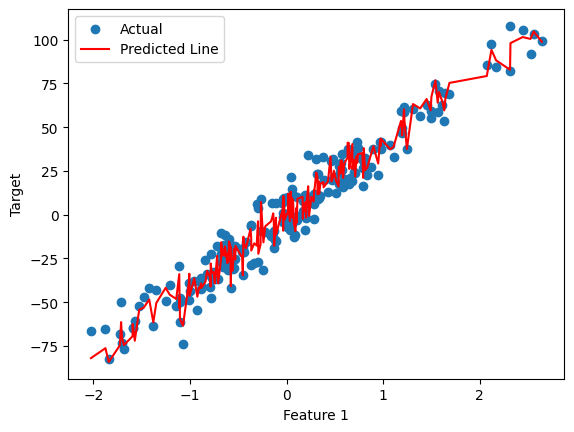

In [14]:
sorted_idx = x_test[:, 0].argsort()
x_sorted = x_test[sorted_idx, 0]
y_test_sorted = y_test[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]


plt.scatter(x_sorted, y_test_sorted, label="Actual")
plt.plot(x_sorted, y_pred_sorted, color="red", label="Predicted Line")
plt.xlabel("Feature 1")
plt.ylabel("Target")
plt.legend()
plt.show()


In [15]:
Pipeline_sk.predict([[0.5, 0.5]])

array([23.9505814])

### second: Linear regression scratch

In [16]:
Pipeline_sc = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression_scratch())
])

In [17]:
Pipeline_sc.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 <__main__.LinearRegression_scratch object at 0x00000216C841D400>)])

In [18]:
y_pred = Pipeline_sc.predict(x_test)

In [19]:
print(f"mean square error: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"mean absolute error: {metrics.median_absolute_error(y_test, y_pred)}")
print(f"root mean square error: {metrics.root_mean_squared_error(y_test, y_pred)}")
print(f"r2 scores: {metrics.r2_score(y_test, y_pred)}")

mean square error: 37.14509347489376
mean absolute error: 4.017799897990814
root mean square error: 6.094677470949038
r2 scores: 0.9764746537796661


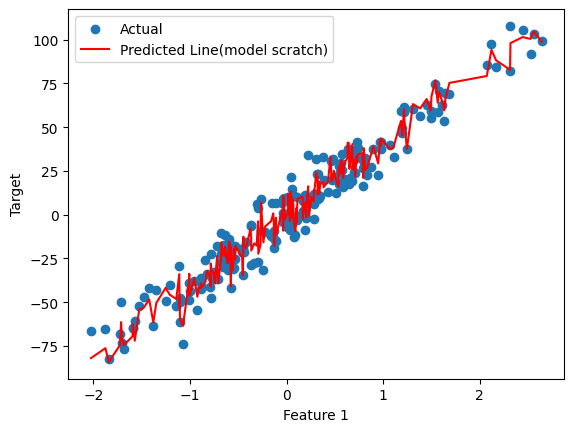

In [21]:
sorted_idx = x_test[:, 0].argsort()
x_sorted = x_test[sorted_idx, 0]
y_test_sorted = y_test[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]


plt.scatter(x_sorted, y_test_sorted, label="Actual")
plt.plot(x_sorted, y_pred_sorted, color="red", label="Predicted Line(model scratch)")
plt.xlabel("Feature 1")
plt.ylabel("Target")
plt.legend()
plt.show()


In [22]:
Pipeline_sc.predict([[0.5, 0.5]])

array([23.95058136])